<a href="https://colab.research.google.com/github/VeraYujiaDING/Credit-card-fraud-detection/blob/main/Card_Fraud_Detection_0818.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Understanding the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from xgboost import XGBClassifier

In [5]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_curve, recall_score, precision_score, average_precision_score

In [6]:
import itertools

In [7]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.shape

(284807, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Exploratory data analysis

### 1. Check missing value

In [10]:
df.isnull().values.any()

False

### 2. Data distribution/imbalance

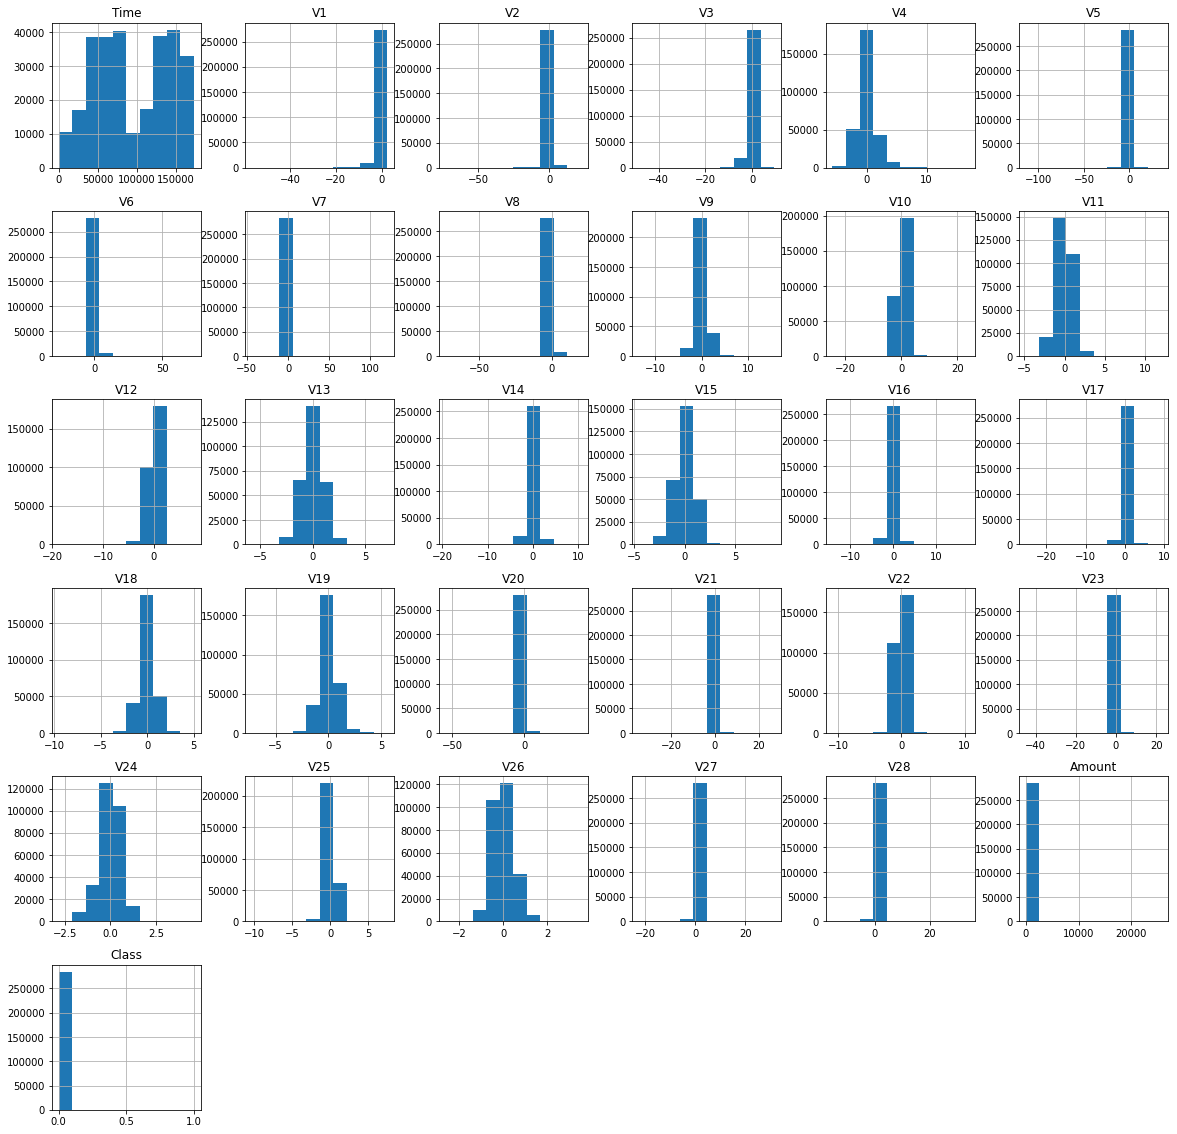

In [11]:
df.hist(figsize = (20, 20))
plt.show()

First check with transaction **Class**.

In [12]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
#pct for norm:
df['Class'].value_counts()[0]/df['Class'].count()*100

99.82725143693798

In [14]:
#pct for fraud:
df['Class'].value_counts()[1]/df['Class'].count()*100

0.1727485630620034

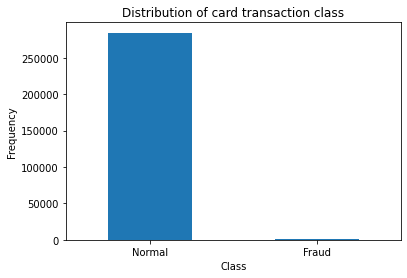

In [15]:
pd.value_counts(df['Class'], sort = True).plot(kind = 'bar', rot=0)
plt.title('Distribution of card transaction class')
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show();

In [16]:
norm = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

As you can see, most of data records are normal ones. Though it's consistent with our common sense, this distribution represents an obviously imbalanced dataset.

Now check with **Time** distribution for two classes.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


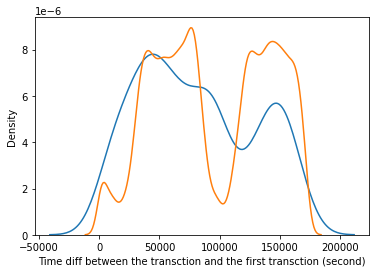

In [17]:
ax = sns.distplot(fraud['Time'],label='Fraud', hist=False)
ax = sns.distplot(norm['Time'],label='Normal', hist=False)
ax.set(xlabel='Time diff between the transction and the first transction (second)')
plt.show();

Seems like Time is not an influential factor for normal and fraud transactions - we could simply delete this column!

In [18]:
df.drop('Time', axis = 1, inplace = True)

Now check with **Amount** distribution for two classes.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


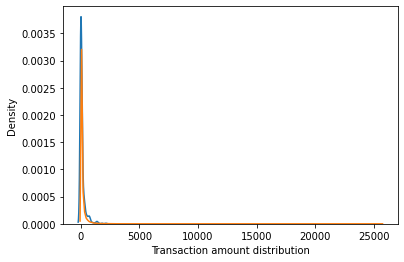

In [19]:
ax = sns.distplot(fraud['Amount'],label='Fraud', hist=False)
ax = sns.distplot(norm['Amount'],label='Normal', hist=False)
ax.set(xlabel='Transaction amount distribution')
plt.show();

For normal transactions, the transaction amount spreads in a wide range; while for fraud ones,the amount densed in tiny amount.

### 3. Data scaling

First we try to standardize the Amount variable and drop the initial one.

In [20]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))

### 4. Split data

In [21]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Modeling on imbalanced dataset

In this part, we will first utilize undersampling technique to resample our dataset. Afterwards, we'll conduct the four models (Logistic Regression, Decision Tree, Random Forest, and XGBoost) we've used above to train the balanced dataset. Here GridSearchCV is utilized for figuring out optimal parameters. 

In my previous modeling reports, KNN and SVM are quite popular, while both didn't show in this analysis. Why?
 * for **SVM**, it becomes less efficient when facing large dataset - in this case, nearly 250K records. Large computational power and resource is not what we want to make the data transformation. -> quit anyway
 * for **KNN**, things are a bit different. Still with so many data, KNN is not memory efficient. On the other hand, similar to SVM, KNN is computional power consuming, which is strong province for us to avoid using it in this case as well.

In terms of model evaluation, given that our dataset is heavily imbalanced, it's not a good idea to compare with traditional metrics like accuracy, which is also highlighted in the Kaggle dataset instruction. Therefore, we prefer to use ROC-AUC score instead to better understand the model performance under various classification thresholds.

In [23]:
performance = pd.DataFrame(columns=['Model Name','Accuracy score','F1 score', 'AUC'],)

### Logistic Regression

In [24]:
m_lr = LogisticRegression()
m_lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred_lr = m_lr.predict(X_test)

In [26]:
acc_lr = accuracy_score(y_test, y_pred_lr)

In [27]:
f1_lr = f1_score(y_test, y_pred_lr)

In [28]:
confusion_matrix(y_test, y_pred_lr, labels = [0, 1])

array([[85284,    12],
       [   56,    91]])

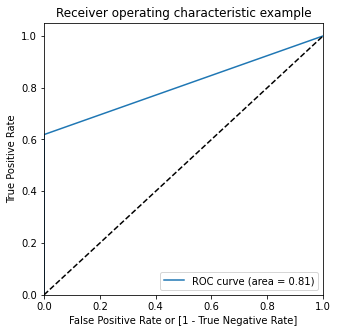

In [29]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_pred_lr)
auc_score_lr = metrics.roc_auc_score( y_test, y_pred_lr )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score_lr )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [30]:
newResult = {'Model Name':'Logistic Regression','Accuracy score':acc_lr,'F1 score':f1_lr, 'AUC':auc_score_lr} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score,AUC
0,Logistic Regression,0.999204,0.728,0.809453


### Decision Tree

In [31]:
m_dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
m_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [32]:
y_pred_dt = m_dt.predict(X_test)

In [33]:
acc_dt = accuracy_score(y_test, y_pred_dt)

In [34]:
f1_dt = f1_score(y_test, y_pred_dt)

In [35]:
confusion_matrix(y_test, y_pred_dt, labels = [0, 1])

array([[85277,    19],
       [   35,   112]])

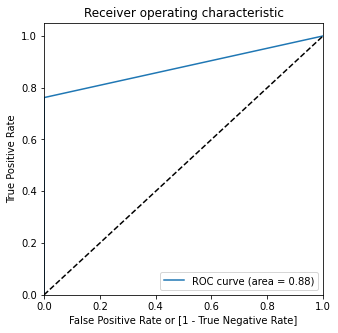

In [36]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_pred_dt)
auc_score_dt = metrics.roc_auc_score( y_test, y_pred_dt )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score_dt )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show();

In [37]:
newResult = {'Model Name':'Decision Tree','Accuracy score':acc_dt,'F1 score':f1_dt, 'AUC':auc_score_dt} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score,AUC
0,Logistic Regression,0.999204,0.728000,0.809453
1,Decision Tree,0.999368,0.805755,0.880841


### Random Forest

In [38]:
m_rf = RandomForestClassifier(max_depth = 4)
m_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4)

In [39]:
y_pred_rf = m_rf.predict(X_test)

In [40]:
acc_rf = accuracy_score(y_test, y_pred_rf)

In [41]:
f1_rf = f1_score(y_test, y_pred_rf)

In [42]:
confusion_matrix(y_test, y_pred_rf, labels = [0, 1])

array([[85287,     9],
       [   49,    98]])

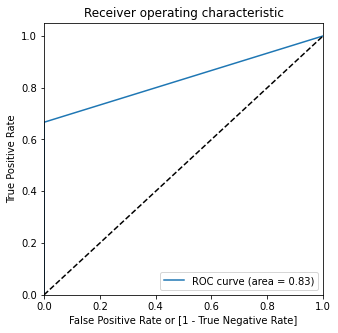

In [43]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rf)
auc_score_rf = metrics.roc_auc_score(y_test, y_pred_rf )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score_rf )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show();

In [44]:
newResult = {'Model Name':'Random Forest','Accuracy score':acc_rf,'F1 score':f1_rf,'AUC':auc_score_rf} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score,AUC
0,Logistic Regression,0.999204,0.728000,0.809453
1,Decision Tree,0.999368,0.805755,0.880841
2,Random Forest,0.999321,0.771654,0.833281


### XGBoost

In [45]:
m_xgb = XGBClassifier(max_depth = 4)
m_xgb.fit(X_train, y_train)

XGBClassifier(max_depth=4)

In [46]:
y_pred_xgb = m_xgb.predict(X_test)

In [47]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)

In [48]:
f1_xgb = f1_score(y_test, y_pred_xgb)

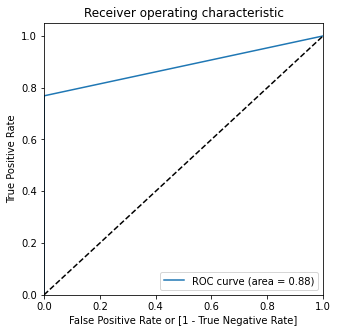

In [49]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_xgb)
auc_score_xgb = metrics.roc_auc_score(y_test, y_pred_xgb )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score_xgb )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show();

In [50]:
newResult = {'Model Name':'XGBoost','Accuracy score':acc_xgb,'F1 score':f1_xgb,'AUC':auc_score_xgb} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score,AUC
0,Logistic Regression,0.999204,0.728000,0.809453
1,Decision Tree,0.999368,0.805755,0.880841
2,Random Forest,0.999321,0.771654,0.833281
3,XGBoost,0.999497,0.840149,0.884301


Obviously, XGBoost is the best performer in all evaluation metrics!

# Modeling on balanced data after undersampling

In this part, we will first utilize undersampling technique to resample our dataset. Afterwards, we'll conduct the four models (Logistic Regression, Decision Tree, Random Forest, and XGBoost) we've used above to train the balanced dataset. Here GridSearchCV is utilized for figuring out optimal parameters. The model with the highest score in both training and cross-validation dataset will be regarded as the best model.

Meanwhile, as guided in the Kaggle dataset instruction, we'd utilize a series of new metrics like **Precision score, Recall score**, etc to evaluate the performance of different models.

### Undersampling

In [51]:
Counter(y_train)

Counter({0: 199019, 1: 345})

In [52]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [53]:
Counter(y_train_rus)

Counter({0: 345, 1: 345})

### Logistic regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=0)
# Specify params
parameters = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
# Specifing score as roc-auc
m_cv_lr = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = parameters, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 
# Fit the model
m_cv_lr.fit(X_train_rus, y_train_rus)

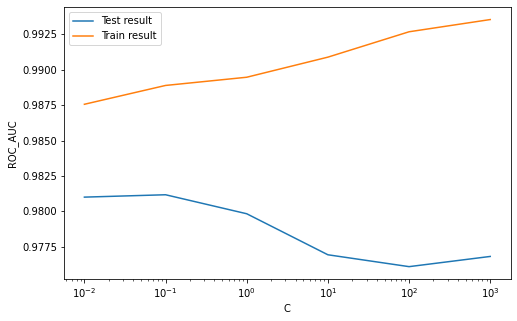

In [55]:
cv_results = pd.DataFrame(m_cv_lr.cv_results_)

# plot of C versus train and validation scores
plt.figure(figsize=(8, 5))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('ROC_AUC')
plt.legend(['Test result', 'Train result'], loc='upper left')
plt.xscale('log');

In [56]:
# Best score with best C
best_score = m_cv_lr.best_score_
best_C = m_cv_lr.best_params_['C']
print(" The highest test ROC_AUC is {0} at C = {1}".format(best_score, best_C))

 The highest test ROC_AUC is 0.9811662623920097 at C = 0.1


In [57]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

1. Predictions on the train set

In [58]:
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [59]:
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [60]:
metrics.roc_auc_score(y_train_rus, y_train_pred_proba)

0.9884141986977526

In [63]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01,1,0,1])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

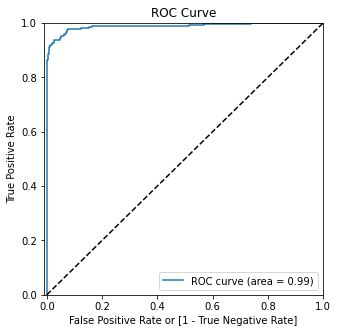

In [64]:
draw_roc(y_train_rus, y_train_pred_proba)

2. Predictions on the test set

In [65]:
y_test_pred = logistic_bal_rus_model.predict(X_test)

In [66]:
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [67]:
metrics.roc_auc_score(y_test, y_test_pred_proba)

0.9798186579077326

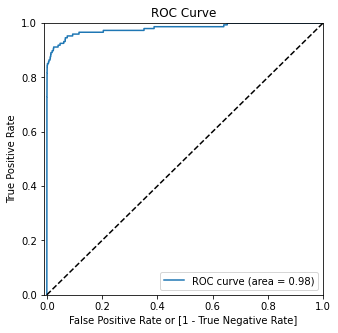

In [68]:
draw_roc(y_test, y_test_pred_proba)

In [69]:
print('Train set: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train_rus, y_train_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train_rus, y_train_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train_rus, y_train_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train_rus, y_train_pred)))

Train set: 

Recall Score: 0.92
Precision Score: 0.98
F1 Score: 0.95
Accuracy Score: 0.95


In [70]:
print('Test set:\n')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_test_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_test_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_test_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

Test set:

Recall Score: 0.91
Precision Score: 0.05
F1 Score: 0.10
Accuracy Score: 0.97


### Decision tree

In [71]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [72]:
cv_results = pd.DataFrame(grid_search.cv_results_)

In [73]:
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9679647132955261
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [74]:
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

1. Prediction on the train set

In [75]:
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

In [76]:
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]
metrics.roc_auc_score(y_train_rus, y_train_pred_proba)

0.9842302037387104

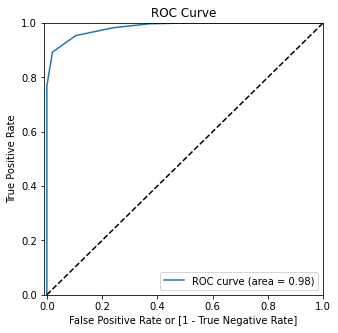

In [77]:
draw_roc(y_train_rus, y_train_pred_proba)

2. Prediction on the test set

In [78]:
y_test_pred = dt_bal_rus_model.predict(X_test)

In [79]:
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_test_pred_proba)

0.9581955578141967

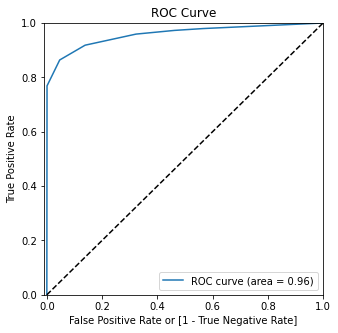

In [80]:
draw_roc(y_test, y_test_pred_proba)

In [81]:
print('Train set: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train_rus, y_train_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train_rus, y_train_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train_rus, y_train_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train_rus, y_train_pred)))

Train set: 

Recall Score: 0.89
Precision Score: 0.98
F1 Score: 0.93
Accuracy Score: 0.94


In [82]:
print('Test set:\n')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_test_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_test_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_test_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

Test set:

Recall Score: 0.86
Precision Score: 0.03
F1 Score: 0.06
Accuracy Score: 0.95


### Random forest

In [83]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [84]:
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc-auc of 0.97731549939508 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [85]:
rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)

rfc_bal_rus_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

1. Prediction on the train set

In [106]:
y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

In [107]:
y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]
metrics.roc_auc_score(y_train_rus, y_train_pred_proba)

0.9884730098718757

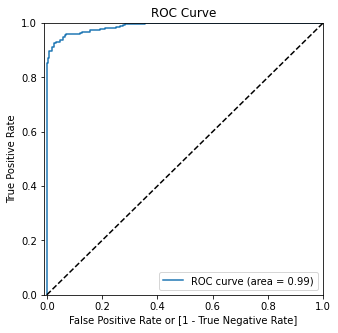

In [108]:
draw_roc(y_train_rus, y_train_pred_proba)

2. Prediction on the test set

In [112]:
y_test_pred = rfc_bal_rus_model.predict(X_test)

In [113]:
y_test_pred_proba = rfc_bal_rus_model.predict_proba(X_test)[:,1]

In [114]:
metrics.roc_auc_score(y_test, y_test_pred_proba)

0.9697874436775273

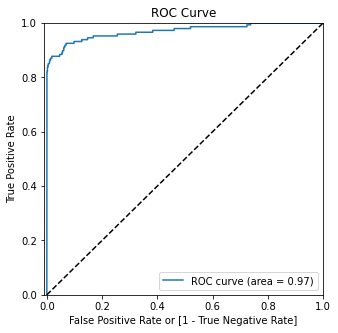

In [115]:
draw_roc(y_test, y_test_pred_proba)

In [90]:
print('Train set: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train_rus, y_train_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train_rus, y_train_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train_rus, y_train_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train_rus, y_train_pred)))

Train set: 

Recall Score: 0.90
Precision Score: 0.98
F1 Score: 0.94
Accuracy Score: 0.94


In [91]:
print('Test set:\n')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_test_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_test_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_test_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

Test set:

Recall Score: 0.88
Precision Score: 0.04
F1 Score: 0.07
Accuracy Score: 0.96


### XGBoost

In [92]:
# creating a KFold object 
folds = 3
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)
# set up GridSearchCV()
m_cv_xgb = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
# fit the model
m_cv_xgb.fit(X_train_rus, y_train_rus)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

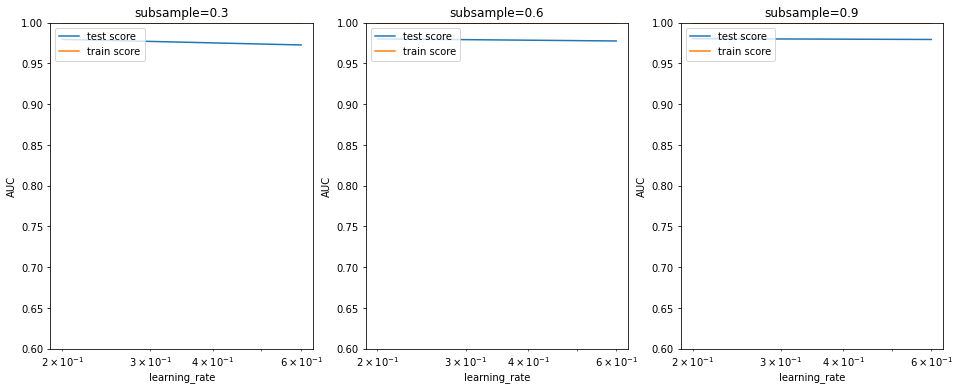

In [93]:
cv_results = pd.DataFrame(m_cv_xgb.cv_results_)
plt.figure(figsize=(16,6))
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 
for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]
    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [94]:
m_cv_xgb.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [95]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6})

1. Prediction on the train set

In [96]:
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [97]:
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [98]:
metrics.roc_auc_score(y_train_rus, y_train_pred_proba)

1.0

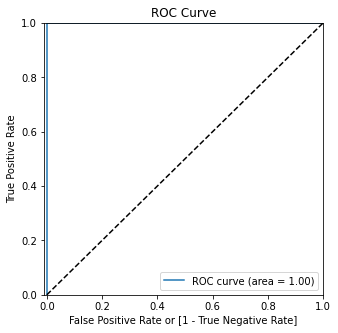

In [99]:
draw_roc(y_train_rus, y_train_pred_proba)

2. Prediction on the test set

In [100]:
y_test_pred = xgb_bal_rus_model.predict(X_test)

In [101]:
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [102]:
metrics.roc_auc_score(y_test, y_test_pred_proba)

0.9768529152422551

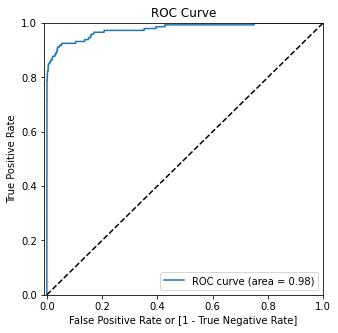

In [103]:
draw_roc(y_test, y_test_pred_proba)

In [104]:
print('Train set: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train_rus, y_train_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train_rus, y_train_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train_rus, y_train_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train_rus, y_train_pred)))

Train set: 

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 1.00


In [105]:
print('Test set:\n')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_test_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_test_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_test_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

Test set:

Recall Score: 0.91
Precision Score: 0.03
F1 Score: 0.07
Accuracy Score: 0.96


Both **XGBoost** and Logistic Regression performs better in terms of precision and recall score.

In the next part, we'd try another resampling methodology - **SMOTE** (Synthetic Minority Oversampling Technique) and modeling once again with the revised dataset.

# Modeling on balanced data after SMOTE

As a comparison with undersampling approach, here we would also consider the oversampling method. To save the sapce, I only show the part with SMOTE, a typical example of oversampling as below to represent the oversampling family. ;)

**SMOTE** (Synthetic Minority Oversampling Technique) uses nearest neighbor algorithm to create synthetic data.

### Oversampling

In [116]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [117]:
#before SMOTE
X_train.shape

(199364, 29)

In [118]:
#after SMOTE
X_train_smote.shape

(398038, 29)

### Logistic regression

In [119]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [120]:
cv_results = pd.DataFrame(model_cv.cv_results_)

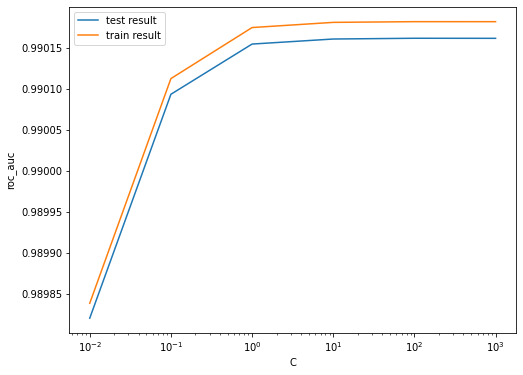

In [121]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [122]:
logistic_bal_smote = LogisticRegression(C=0.1)
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

1. Prediction on the train set

In [123]:
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

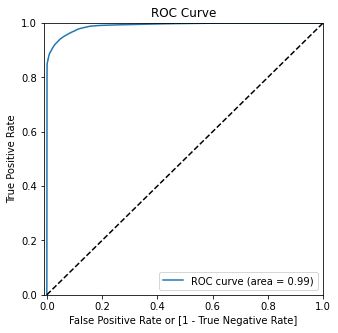

In [124]:
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

2. Prediction on the test set

In [125]:
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [126]:
print('Train set: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train_smote, y_train_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train_smote, y_train_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train_smote, y_train_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train_smote, y_train_pred)))

Train set: 

Recall Score: 0.92
Precision Score: 0.97
F1 Score: 0.94
Accuracy Score: 0.95


In [127]:
print('Test set:\n')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_test_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_test_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_test_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

Test set:

Recall Score: 0.92
Precision Score: 0.06
F1 Score: 0.11
Accuracy Score: 0.98


### Decision tree

In [128]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [129]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,7.435203,0.901384,0.057464,0.009165,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.987941,0.988555,0.988218,0.988238,0.000251,6
1,11.220754,1.346115,0.092918,0.013466,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.987937,0.988569,0.988218,0.988241,0.000258,5
2,7.227379,0.527638,0.048585,0.000424,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.987911,0.988570,0.988196,0.988226,0.000270,8
3,7.129763,0.310818,0.049320,0.000911,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.987910,0.988573,0.988197,0.988227,0.000271,7
4,12.710638,0.018066,0.057214,0.000714,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997804,0.998062,0.998064,0.997977,0.000122,2
5,14.453251,1.670561,0.069018,0.011894,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997943,0.997994,0.998127,0.998021,0.000078,1
6,16.689249,1.915604,0.066004,0.011810,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997838,0.997874,0.997965,0.997892,0.000053,3
7,13.358262,0.686337,0.057457,0.001949,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997853,0.997855,0.997924,0.997877,0.000033,4


In [130]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9980214343758068
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [131]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

1. Prediction on the train set

In [132]:
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [133]:
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]
metrics.roc_auc_score(y_train_smote, y_train_pred_proba)

0.9987249155488227

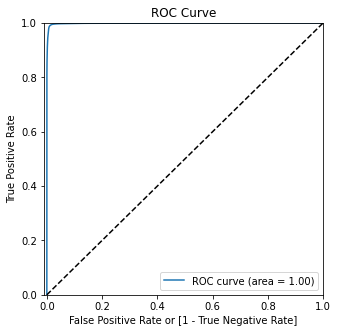

In [134]:
draw_roc(y_train_smote, y_train_pred_proba)

2. Prediction on the test set

In [135]:
y_test_pred = dt_bal_smote_model.predict(X_test)

In [136]:
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_test_pred_proba)

0.9048701313202075

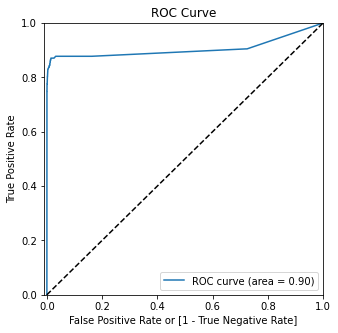

In [137]:
draw_roc(y_test, y_test_pred_proba)

In [138]:
print('Train set: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train_smote, y_train_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train_smote, y_train_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train_smote, y_train_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train_smote, y_train_pred)))

Train set: 

Recall Score: 0.99
Precision Score: 0.99
F1 Score: 0.99
Accuracy Score: 0.99


In [139]:
print('Test set:\n')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_test_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_test_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_test_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

Test set:

Recall Score: 0.86
Precision Score: 0.11
F1 Score: 0.19
Accuracy Score: 0.99


### XGBoost

In [141]:
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [144]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [146]:
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6})

1. Prediction on the train set

In [147]:
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [148]:
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]
metrics.roc_auc_score(y_train_smote, y_train_pred_proba)

0.9990594549693457

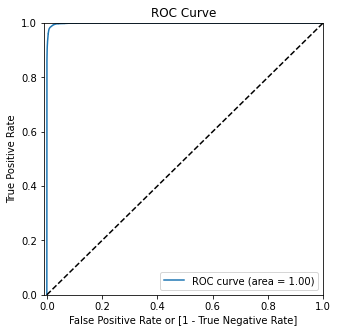

In [149]:
draw_roc(y_train_smote, y_train_pred_proba)

2. Prediction on the test set

In [150]:
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [151]:
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_test_pred_proba)

0.9724748837820628

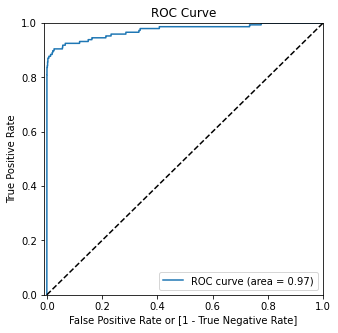

In [152]:
draw_roc(y_test, y_test_pred_proba)

In [153]:
print('Train set: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train_smote, y_train_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train_smote, y_train_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train_smote, y_train_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train_smote, y_train_pred)))

Train set: 

Recall Score: 0.98
Precision Score: 0.99
F1 Score: 0.99
Accuracy Score: 0.99


In [154]:
print('Test set:\n')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_test_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_test_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_test_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

Test set:

Recall Score: 0.88
Precision Score: 0.14
F1 Score: 0.24
Accuracy Score: 0.99


# Conclusion

To confirm the best model, we need to first go back to the real business world - for a bank, what really matters to them when detecting fraudulent card transactions?

In many cases, it should be avoiding the possible severe losses from high-value fraudulent transactions. With that being said, a model with **high recall rate** worths our highlights for its capability to capture suspicious transactions.

**SMOTE** is proven to be an effective method for imbalanced dataset and **Logistic Regression** performs best in terms of recall score (0.92). The high interpretability even further proves the effectiveness of Logistic Regression model. 

In [155]:
print('AUC for Train set: ', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold: ",threshold)
#For this best model, the most proper threshold is ~0.34, through which we could obtain the best ROC score.

AUC for Train set:  0.9901231930501675
Threshold:  0.337919187661101


# Reference:

1. [Fraud detection handbook](https://fraud-detection-handbook.github.io/fraud-detection-handbook/Foreword.html)

2. [Credit Fraud || Dealing with Imbalanced Datasets](https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook)

3. [zmzhou_creditcard_fraud_detection](https://github.com/zmzhouXJTU/CreditCard_Fraud_Detection/blob/master/Creditcard_fraud_detection.py)

4. [sahidul-shaikh_creditcard_fraud_detection](https://github.com/sahidul-shaikh/credit-card-fraud-detection/blob/main/credit_card_fraud_detection.ipynb)
